In [81]:
# Import all the required libraries required for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
# Importing the Data set for Multiple Linear Regression using pandas

Data = pd.read_csv(r"C:\Users\Vinoth\Desktop\HOPE AI\Machine Learning\Mutiple Linear Regression\DataSet\50_Startups.csv")

In [83]:
Data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [84]:
Data.shape

(50, 5)

# Observation: From the above output we got to know that there are 4 independent Variables and 1 dependent variables

## --> there are total 50 rows and 5 columns in data set

## ---> since the input and output values are integer we can use machine learning domain to solve this problem

## ---> Requirements are clear and input& output variables are given so we can use supervised machine learning as technique to train the model.

## ---> Since the predicting values are integer and continous data we can consider it as regression problem.

In [85]:
# Lets check if there is any null data in the data set. Note axis=0 is column wise and axis = 1 is row wise

Data[Data.isnull().any(axis=1)]

# from below output we got to know there is no any null data present in the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit


In [86]:
# Lets check if there is any NA values in the data set. Note axis =0 is columns wise and axis =1 is row wise

Data[Data.isna().any(axis=1)]

# from the below output we got to know that there is no presence of NA values in the Dataset

,R&D Spend,Administration,Marketing Spend,State,Profit


In [87]:
Data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

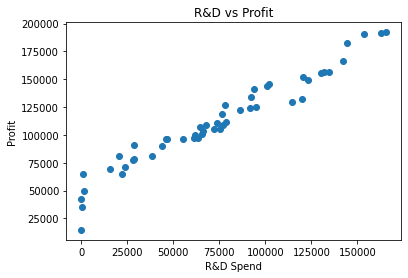

In [88]:
# Lets try to plot the graphs for age vs income using the pyplot library from matplotlib

plt.scatter(Data["R&D Spend"],Data["Profit"])
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("R&D vs Profit")
plt.show()

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

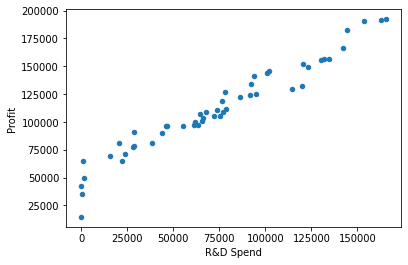

In [89]:
# we can also plot the above scatter plot using Pandas dataframe itself
Data.plot(x="R&D Spend", y= "Profit",kind='scatter')

In [90]:
# OBSERVATION: From the data distribution we can see there is almost a linear relationship between the R&D and profit columns

Text(0.5, 1.0, 'Administration vs Profit')

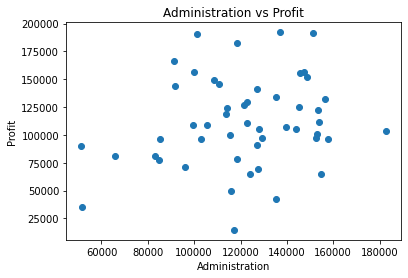

In [91]:
# Similarly we can check the data correlation between the other columns against the profit column

plt.scatter(x=Data['Administration'], y=Data["Profit"])
plt.xlabel('Administration')
plt.ylabel("Profit")
plt.title("Administration vs Profit")

Text(0.5, 1.0, 'Marketing Spend vs Profit')

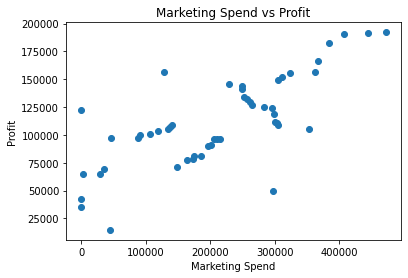

In [92]:
plt.scatter(x=Data['Marketing Spend'], y=Data["Profit"])
plt.xlabel('Marketing Spend')
plt.ylabel("Profit")
plt.title("Marketing Spend vs Profit")

# Observation: The Marketing Spend and Administration data corelation against profit is not linear 

## Lets Convert the State category column to numeric column
## Below are the steps to conver category data to numeric data
## There are two types of categorical data one is nominal and other one is ordinal
## the nominal category is where in you will not able to compare the values against another as example in state column can we compare the values against another (newyork vs india)
## the ordinal category where we can compare the values against another for example the size of tshirt (Large vs medium vs small vs extra small)

## So in our dataset the values falls under the nominal category so we are going to use one hot encoding to convert this to numeric value but this method can increase the dimension of the data
## If suppose it falls under the ordinal category we are gonna use label endcoding to convert it into the numeric value

In [93]:
# converting the state column to numeric value using one hot encoding
State = pd.get_dummies(Data["State"],prefix="State",drop_first=True)

In [94]:
State.shape

(50, 2)

In [95]:
Data.shape

(50, 5)

In [98]:
# Concating the State and existing Data dataframe 
Data = pd.concat([Data,State],axis=1)

In [101]:
Data = Data.iloc[:,[0,1,2,3,5,6,4]]

In [108]:
Data.drop("State",inplace=True,axis=1)

In [109]:
# Final Data is ready for the model training as we have already checked for data cleansing and data analysis
Data.head(10)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,1,192261.83
1,162597.70,151377.59,443898.53,0,0,191792.06
2,153441.51,101145.55,407934.54,1,0,191050.39
3,144372.41,118671.85,383199.62,0,1,182901.99
4,142107.34,91391.77,366168.42,1,0,166187.94
5,131876.90,99814.71,362861.36,0,1,156991.12
6,134615.46,147198.87,127716.82,0,0,156122.51
7,130298.13,145530.06,323876.68,1,0,155752.60
8,120542.52,148718.95,311613.29,0,1,152211.77
9,123334.88,108679.17,304981.62,0,0,149759.96


## Final Obeservation---> As already we know that only the R&D Spend column has linear relationship with profit column its not better way to got with mutiple linear regression but as now for practise we can try mutiple linear regression on this dataset and see the accuracy of prediction